### OpenCV Camera Calibration
![calibration](calibration example.png)
下面的任务是实现相机校准(camera calibration)和变形矫正(distortion correction)！这个过程主要包括三个步骤：   
1. 使用cv2.findChessboardCorners()寻找象棋靶标图像中的角点，然后aggregate arrays of image points (2D image plane points) and object points (3D world points) .    
2. 使用OpenCVcv2.calibrateCamera()函数来计算校准矩阵和畸变参数。   
3. 使用cv2.undistort()函数来消除测试图像的畸变。

### Intrinsics vs. Extrinsics
Intrinsic parameters are those things that are inherent to the camera itself, namely the focal length and optical center as well as the distortion coefficients. These properties remain the same no matter how the camera is positioned within the world. The extrinsic parameters of the calibration process describe how the camera's reference frame is oriented within the world reference frame. For a detailed treatment of image formation, intrinsics, extrinsics and much more, check out the free Udacity Intro to Computer Vision Course.

Computing the mapping between image points and world points depends on both the intrinsic and extrinsic parameters. In this section we'll focus on the intrinsics.

### The Strategy
一般情况下,为了得到一个图像平面上好的采样点，你需要使用许多的测试靶标的图像来校准。在下面的练习中，你将在几十张图片上执行寻找角点这一步骤。

### Calibrate using OpenCV
给定目标点，图像点以及图像的形状，就可以实时校正操作了。你将使用cv2.calibrateCamera()函数：    
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, 
                                                  (img.shape[1], img.shape[0]), 
                                                   None, None)    
                                                   
这里值得关注的输出就是mtx和dist，他们各自包括**intrinsic camera matrix** 和 **distortion coefficients** 。    
intrinsic camera matrix 一般是这样表示的：
![intrinsic camera matrix](intrinsic camera matrix.png)    
在上面的矩阵中，fx和fy代表焦距（当像素是正方形时，它们是相等的），二cx和cy则代表(x,y)平面上的相机（光学）中心。    
在dist中有五个畸变参数，它们按下面的顺序排列：    
![distortion coefficients](distortion coefficients.png)    
其中，k为径向畸变系数(radial distortion coefficients),p为切向畸变参数(tangential distortion coefficients)。为了矫正图像中的径向和切向畸变，你将使用cv2.undistort()函数：  
undist = cv2.undistort(img, mtx, dist, None, mtx)   
该函数实施以下方程的操作。   
![radial and tangential undistortion](radial and tangential undistortion.png)    
为了更好的可视化这一步骤发生的一切，可以运行目录下RoboND-Camera-Calibration内的代码。

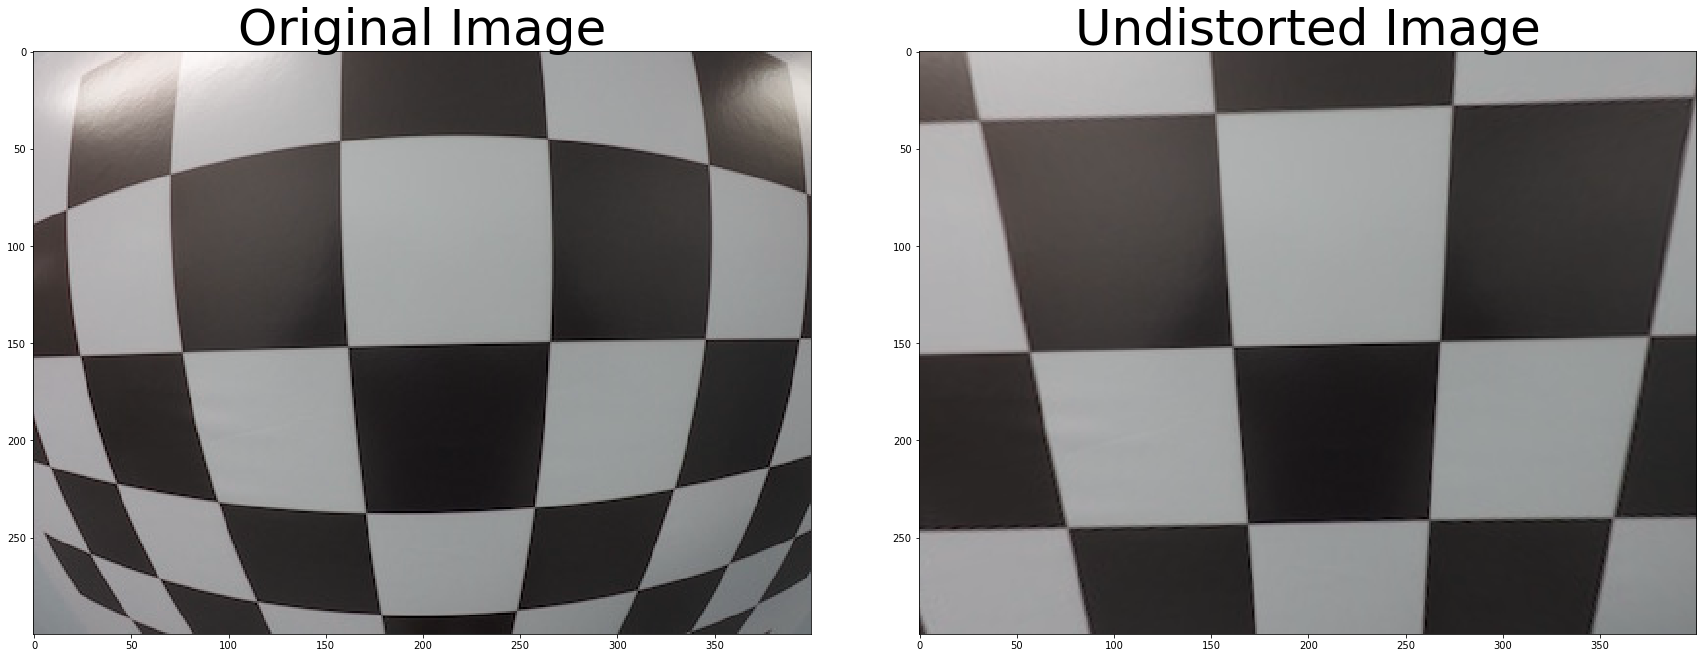

In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nx = 8
ny = 6
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((ny * nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./RoboND-Camera-Calibration/calibration_small/Cal*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = mpimg.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)


img = cv2.imread('./RoboND-Camera-Calibration/calibration_small/test_image.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

# Perform undistortion
undist = cv2.undistort(img, mtx, dist, None, mtx)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undist)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)